# **Heart Disease Prediction**

# Setup progetto

Installiamo le librerie grafiche e matematiche che ci serviranno in seguito.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import  cross_val_score, GridSearchCV, RandomizedSearchCV

Andiamo ora a caricare il Dataset.

In [ ]:
dataset = pd.read_csv('heart_dataset.csv')

# Analisi Dataset

## Informazioni generali

In questa sezione andiamo a visualizzare delle informazioni generali del nostro dataset.

In [ ]:
#Vediamo quanti valori abbiamo nel dataset
print("Numero di righe del dataset:", dataset.shape[0])
print("Numero di colonne del dataset:", dataset.shape[1])

Numero di righe del dataset: 918
Numero di colonne del dataset: 12


In [ ]:
#Vediamo di che tipi sono i dati
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Controlliamo se il dataset presenta dei valori mancanti
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Come possiamo vedere non ci sono valori mancanti.

In [ ]:
#Visualizziamo qualche valore del dataset
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
#Visualizziamo alcune informazioni più specifiche sui dati numerici
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
#Visualizziamo alcune informazioni più specifiche sui dati non numerici
dataset.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


##Gestione dei valori zero


Come possiamo vedere il dataset presenta degli zeri come minimo in 'RestingBP' e 'Cholesterol' e ovviamente questo non è possibile.

> 
Andremo quindi a sostituirli con il valore medio relativo a quelle colonne. 

In [ ]:
#Creiamo un nuovo dataset con i nuovi valori 

new_dataset1 = dataset.copy()

new_dataset1['RestingBP'].replace({0: dataset['RestingBP'].mean()}, inplace=True)
new_dataset1['Cholesterol'].replace({0: dataset['Cholesterol'].mean()}, inplace=True)

In [ ]:
new_dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.000000,54.0,60.0,77.0
RestingBP,918.0,132.540737,17.989932,80.0,120.000000,130.0,140.0,200.0
Cholesterol,918.0,236.047413,56.240952,85.0,198.799564,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.000000,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.000000,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.000000,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.000000,1.0,1.0,1.0


Come possiamo vedere ora i valori minimi di 'RestingBP' e 'Cholesterol' sono cambiati.

##Gestione dei valori non numerici

Come possiamo vedere il nostro dataset presenta dei valori che non sono numerici ma stringhe. 
Più nello specifico le colonne:

*   Sex
*   ChestPainType
*   RestingECG
*   ExerciseAngina
*   ST_Slope

Gli algoritmi che useremo in seguito gestiscono solamente valori numerici, andremo quindi a trasformare tutte queste stringhe.






In [ ]:
#Creiamo un nuovo dataset con i nuovi valori numerici

new_dataset2 = new_dataset1.copy()

new_dataset2['Sex'].replace({'M':1, 'F':0}, inplace=True)
new_dataset2['ChestPainType'].replace({'TA':1, 'ATA':2, "NAP":3, "ASY":0}, inplace=True)
new_dataset2['RestingECG'].replace({'Normal':0, 'ST':1, "LVH":2}, inplace=True)
new_dataset2['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)
new_dataset2['ST_Slope'].replace({'Up':1, 'Flat':0, "Down":2}, inplace=True)

In [ ]:
new_dataset2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.000000,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.000000,1.0,1.0,1.0
ChestPainType,918.0,1.090414,1.267622,0.0,0.000000,0.0,2.0,3.0
RestingBP,918.0,132.540737,17.989932,80.0,120.000000,130.0,140.0,200.0
Cholesterol,918.0,236.047413,56.240952,85.0,198.799564,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.000000,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.000000,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.000000,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.000000,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.000000,0.6,1.5,6.2


Come possiamo vedere ora il nostro dataset presenta solamente valori numerici, avremo infatti:
*   Sex = [1, 0]
*   ChestPainType = [1, 2, 3, 0]
*   RestingECG = [0, 1, 2]
*   ExerciseAngina = [1, 0]
*   ST_Slope = [1, 0, 2]

##Visualizzazione dati

In questa sezione andiamo a visualizzare più nello specifico i dati e le loro correlazioni.

Numero di persone con problemi cardiaci: 508
Numero di persone senza problemi cardiaci: 410 

Percentuale di persone con problemi cardiaci: 55.3 %
Percentuale di persone senza problemi cardiaci: 44.7 %



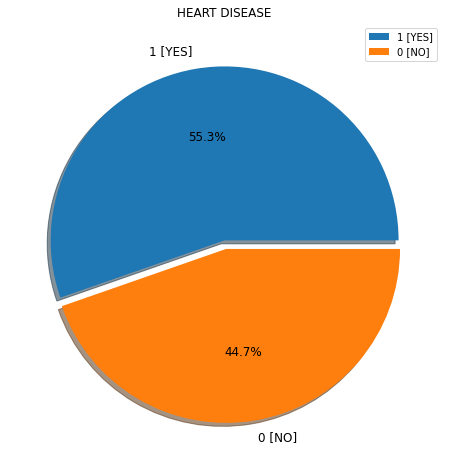

In [ ]:
#Visualizziamo il bilanciamento tra chi ha problemi cardiaci e chi no

print("Numero di persone con problemi cardiaci:", new_dataset2["HeartDisease"].value_counts()[1])
print("Numero di persone senza problemi cardiaci:", new_dataset2["HeartDisease"].value_counts()[0],"\n")

print("Percentuale di persone con problemi cardiaci:",round(new_dataset2["HeartDisease"].value_counts(normalize=True)[1]*100,1),"%") #0.553 * 100
print("Percentuale di persone senza problemi cardiaci:",round(new_dataset2["HeartDisease"].value_counts(normalize=True)[0]*100,1),"%\n") #0.447 * 100

new_dataset2['HeartDisease'].value_counts().plot(kind="pie", 
                                                 title="HEART DISEASE",
                                                 labels=('1 [YES]', '0 [NO]'),
                                                 ylabel='',
                                                 autopct='%1.1f%%',
                                                 legend=True,                                        
                                                 shadow=True,
                                                 fontsize=12,
                                                 explode=(0, 0.05),                                                                                 
                                                 figsize=(8,8));

Il dataset in questo caso risulta essere abbastanza bilanciato.

Numero di uomini: 725
Numero di donne: 193 

Percentuale di uomini: 79.0 %
Percentuale di donne: 21.0 %



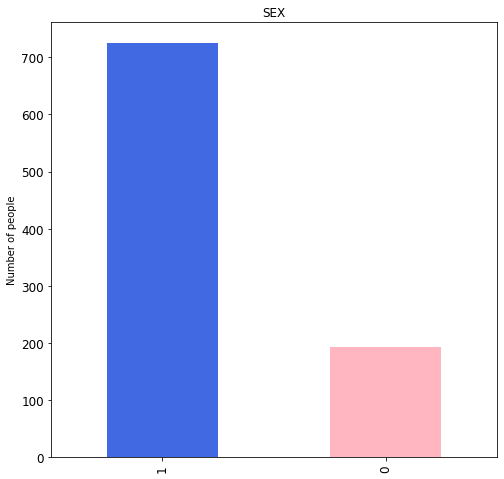

In [ ]:
#Visualizziamo il bilanciamento tra uomini e donne

print("Numero di uomini:", new_dataset2["Sex"].value_counts()[1])
print("Numero di donne:", new_dataset2["Sex"].value_counts()[0],"\n")

print("Percentuale di uomini:",round(new_dataset2["Sex"].value_counts(normalize=True)[1]*100,1),"%")
print("Percentuale di donne:",round(new_dataset2["Sex"].value_counts(normalize=True)[0]*100,1),"%\n")

new_dataset2['Sex'].value_counts().plot(kind="bar",                                     
                                        title="SEX",
                                        ylabel="Number of people",                                
                                        color=["royalblue", "lightpink"],   
                                        fontsize=12,                                                                                   
                                        figsize=(8,8))

Come possiamo vedere il dataset risulta molto sbilanciato.

Età minima: 28 anni
Età massima: 77 anni

Età media: 54 anni



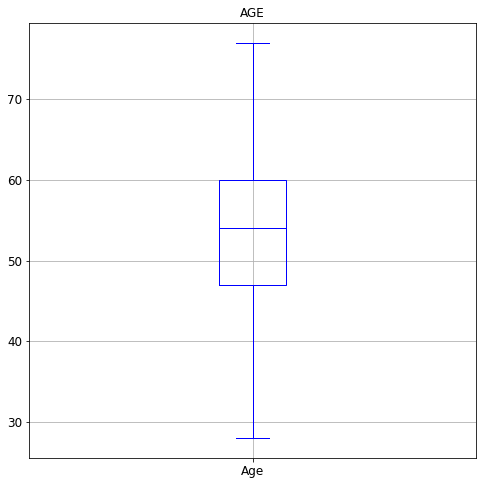

In [ ]:
#Visualizziamo dati riguardanti l'èta delle persone all'intero del dataset 

print("Età minima:", new_dataset2["Age"].min(),"anni")
print("Età massima:", new_dataset2["Age"].max(),"anni\n")

print("Età media:", round(new_dataset2["Age"].mean()),"anni\n")

new_dataset2['Age'].plot(kind="box",
                         title="AGE", 
                         color='blue', 
                         grid=True,                        
                         fontsize=12,                                               
                         figsize=(8,8))

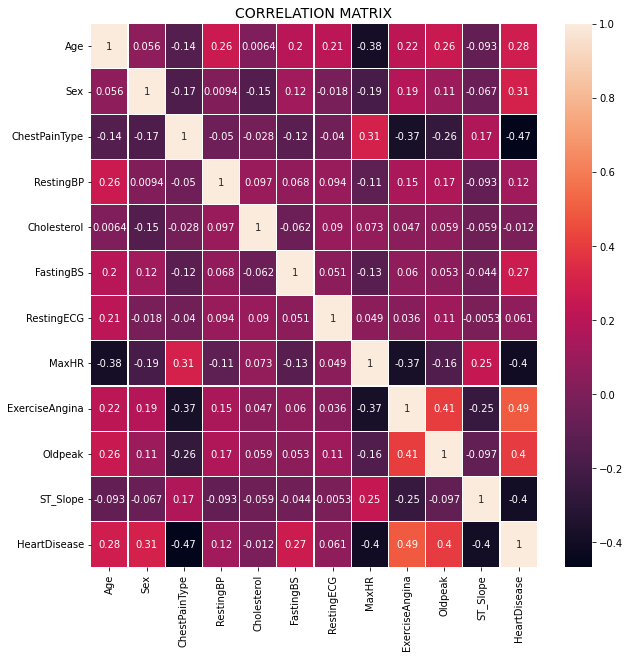

In [ ]:
#Visualizziamo la correlazione tra tutti i dati attraverso una matrice di correlazione

plt.subplots(figsize=(10, 10))

sns.heatmap(new_dataset2.corr(), 
            linewidth=.1, 
            annot=True)

plt.title('CORRELATION MATRIX', fontsize=14)
plt.show()

Come possiamo vedere da questa matrice ci sono dei dati molto correlati tra loro, come: 

*   HeartDisease e ExcerciseAngina (0.49)
*   HeartDisease e Oldpeak (0.4)

e dati poco correlati tra loro, come:
*   HeartDisease e ChestPainType (-0.47)
*   HeartDisease e MaxHR (-0.4)





Persone che soffrono di Angina da sforzo: 371
Persone che soffrono di Angina da sforzo e hanno problemi cardiaci: 316 , 85.2 %



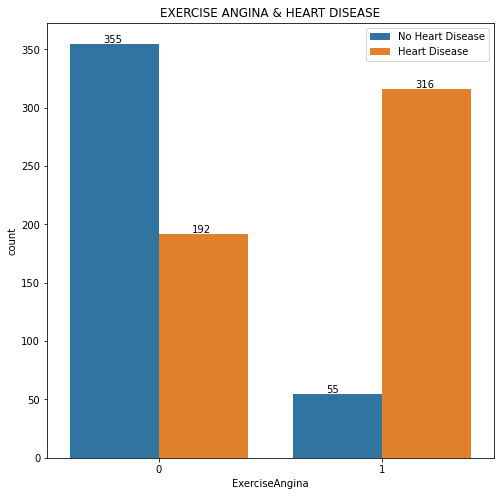

In [ ]:
#Visualizziamo la correlazione tra chi ha problemi cardiaci e chi soffre di Angina da sforzo

plt.figure(figsize = (8,8))

ax = sns.countplot(data=new_dataset2, 
                   x='ExerciseAngina', 
                   hue='HeartDisease')

plt.title('EXERCISE ANGINA & HEART DISEASE', fontsize=12)
labels = ['No Heart Disease','Heart Disease']
plt.legend(labels)

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

print("Persone che soffrono di Angina da sforzo:", new_dataset2["ExerciseAngina"].value_counts()[1])
print("Persone che soffrono di Angina da sforzo e hanno problemi cardiaci:", ax.patches[3].get_height(), ",",
      round((ax.patches[3].get_height()/new_dataset2["ExerciseAngina"].value_counts()[1]) * 100,1),"%\n")
      
plt.show() 


Come possiamo vedere, l'85% delle persone che soffrono di Angina da sforzo hanno problemi cardiaci.

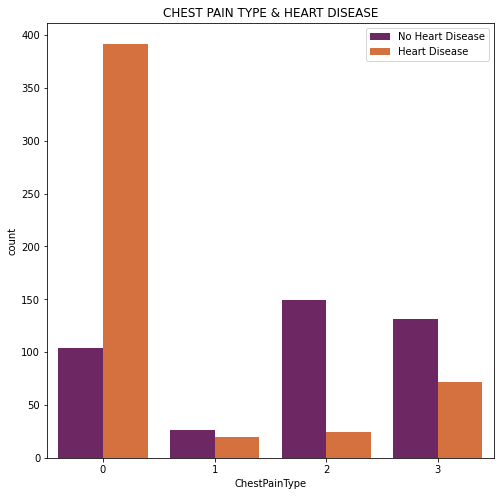

In [ ]:
#Visualizziamo la correlazione tra chi ha problemi cardiaci e il tipo di dolore al petto 

ax = plt.figure(figsize = (8,8))

sns.countplot(data=new_dataset2, 
              x='ChestPainType', 
              hue='HeartDisease',
              palette='inferno')

plt.title('CHEST PAIN TYPE & HEART DISEASE', fontsize=12)
labels = ['No Heart Disease','Heart Disease']
plt.legend(labels)
plt.show()

Come possiamo vedere non c'è alcuna correlazione tra il tipo di dolore al petto e problemi cardiaci.

# Applicazione dei modelli

In questa sezione andiamo a effettuare delle operazioni preliminari sul nostro dataset prima di applicare i vari modelli.

##Divisione in Train set e Test set

Dividiamo il dataset in Train set e Test set (80/20).
>Il Train set sarà usato per 'preparare/allenare' i modelli, mentre il Test set sarà usato per fare delle nuove previsioni.





In [ ]:
#Separiamo la colonna 'HeartDisease'

X = new_dataset2.drop(["HeartDisease"], axis=1) 
y = new_dataset2["HeartDisease"] 

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140.0,289.0,0,0,172,0,0.0,1
1,49,0,3,160.0,180.0,0,0,156,0,1.0,0
2,37,1,2,130.0,283.0,0,1,98,0,0.0,1
3,48,0,0,138.0,214.0,0,0,108,1,1.5,0
4,54,1,3,150.0,195.0,0,0,122,0,0.0,1


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
#Dividiamo il dataset in Train set e Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y)

#stratify = mantiene sempre le proporzioni tra i valori

In [ ]:
print("Numero di elementi in X_train:", X_train.shape)
print("Numero di elementi in X_test:", X_test.shape, "\n")

print("Numero di elementi in y_train:", y_train.shape)
print("Numero di elementi in y_test:", y_test.shape)

Numero di elementi in X_train: (734, 11)
Numero di elementi in X_test: (184, 11) 

Numero di elementi in y_train: (734,)
Numero di elementi in y_test: (184,)


##Scaling dei dati

Come possiamo notare, il nostro dataset presenta delle colonne che hanno dei range di valori molto diversi tra loro (es. Sex=[0,1], MaxHR=[60,202]).
Questo è un problema per i modelli che utilizzeremo in seguito, andremo perciò ad applicare lo Scaling, anche detto normalizzazione dei dati, ovvero andremo a modificare i vari range di valori delle varie colonne in modo che siano tutti simili tra loro, mantendo però le dovute proporzioni.
>Tutto ciò lo faremo attraverso l'algoritmo 'StandardScaler'.





In [ ]:
scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.fit_transform(X_test)

##Fitting dei modellli

Andiamo ora ad applicare i veri e propri modelli sul nostro dataset. Dobbiamo risolvere un problema di classificazione, andremo quindi a scegliere dei modelli che risolvano tale problema, ovvero:

*   Logistic Regression
*   Decision Tree Classifier
*   Gradient Boost Classifier
*   Random Forest Classifier





I vari modelli saranno valutati in base a diverse metriche:

*   Accuracy: quanto le predizioni del modello si avvicinano ai valori reali.
*   Precision: la capacità di non generare falsi positivi.
*   Recall: la capacità di calcolare tutti i positivi.
*   F1 score: il rapporto tra precision e recall.
*   ROC AUC: quanto il modello è preciso, valutato su diverse soglie di valori.
*   Confusion matrix: restituisce una rappresentazione dell'accuratezza di classificazione statistica. 

Info: [Model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)



In [ ]:
#Definisco una funzione per confrontare i risultati

def print_score(y_test, y_pred):
    print('1. Accuracy: {}'.format(round(accuracy_score(y_test, y_pred), 10)))
    print('2. Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('3. Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print('4. F1 score: {}'.format(round(f1_score(y_test, y_pred), 3)))
    print('5. ROC AUC: {}'.format(round(roc_auc_score(y_test, y_pred), 3)))

###Logistic Regression

1. Accuracy: 0.8152173913
2. Precision: 0.788
3. Recall: 0.912
4. F1 score: 0.845
5. ROC AUC: 0.803


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


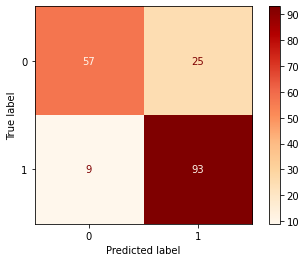

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train_final, y_train)

y_predicted_lr = LR_model.predict(X_test_final)

print_score(y_test, y_predicted_lr)
displr = plot_confusion_matrix(LR_model, X_test_final, y_test ,cmap=plt.cm.OrRd , values_format='d')

LR_ACC = round(accuracy_score(y_test, y_predicted_lr),3) 

###Decision Tree Classifier

1. Accuracy: 0.7391304348
2. Precision: 0.745
3. Recall: 0.804
4. F1 score: 0.774
5. ROC AUC: 0.731


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


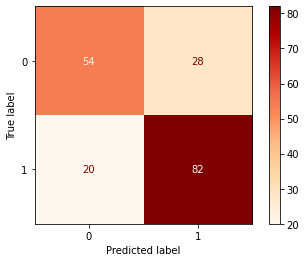

In [ ]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train_final, y_train)

y_predicted_dt = DT_model.predict(X_test_final)

print_score(y_test, y_predicted_dt)
displr = plot_confusion_matrix(DT_model, X_test_final, y_test ,cmap=plt.cm.OrRd , values_format='d')

DT_ACC = round(accuracy_score(y_test, y_predicted_dt),3) 

###Gradient Boost Classifier

1. Accuracy: 0.8206521739
2. Precision: 0.78
3. Recall: 0.941
4. F1 score: 0.853
5. ROC AUC: 0.806


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


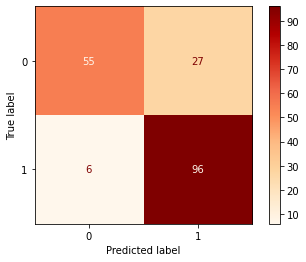

In [ ]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_final,y_train)

y_predicted_gb = GB_model.predict(X_test_final)

print_score(y_test, y_predicted_gb)
displr = plot_confusion_matrix(GB_model, X_test_final, y_test ,cmap=plt.cm.OrRd , values_format='d')

GB_ACC = round(accuracy_score(y_test, y_predicted_gb),3) 

###Random Forest Classifier

1. Accuracy: 0.8097826087
2. Precision: 0.782
3. Recall: 0.912
4. F1 score: 0.842
5. ROC AUC: 0.797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


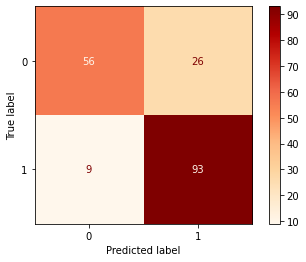

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_final, y_train)

y_predicted_rf = RF_model.predict(X_test_final)

print_score(y_test, y_predicted_rf)
displr = plot_confusion_matrix(RF_model, X_test_final, y_test ,cmap=plt.cm.OrRd , values_format='d')

RF_ACC = round(accuracy_score(y_test, y_predicted_rf),3) 

##Risultati

Confrontiamo fra loro i vari risultati.

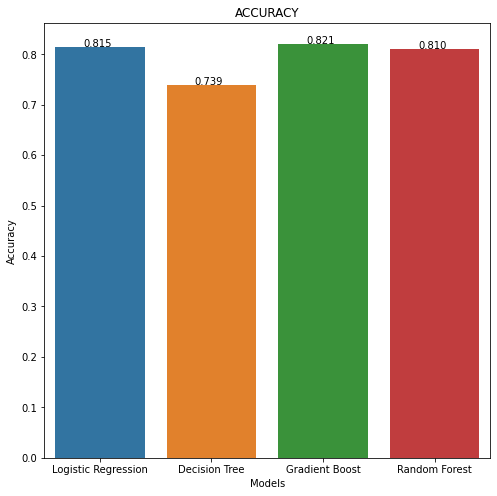

In [ ]:
accuracy_data = pd.DataFrame({"Models": ["Logistic Regression", "Decision Tree", "Gradient Boost", "Random Forest"], 
                              "Accuracy": [LR_ACC, DT_ACC, GB_ACC, RF_ACC]})

plt.figure(figsize = (8,8))

ax = sns.barplot(x="Models", y="Accuracy", data=accuracy_data)

plt.title('ACCURACY')

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

plt.show()

Come possiamo vedere il modello che ha prodotto i risultati migliori è il Gradient Boost Classifier, con un accuracy di 0.82%

##Feature importance

Andiamo a studiare l'impatto che ogni singola feature ha sul modello migliore.

In [ ]:
GB_feature_importance = pd.DataFrame(index=X.columns, 
                                     data=GB_model.feature_importances_,
                                     columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)

GB_feature_importance

,Feature Importance
ST_Slope,0.325063
ChestPainType,0.184852
Oldpeak,0.127172
MaxHR,0.081684
ExerciseAngina,0.063601
Sex,0.053707
Age,0.052088
FastingBS,0.040928
RestingBP,0.033465
Cholesterol,0.027832


Come possiamo vedere la feature che ha meno rilevanza sul nostro modello è 'RestingECG', con un valore di 0.009608. Ne proviamo quindi la rimozione per vedere se i risultati migliorano.

1. Accuracy: 0.8315217391
2. Precision: 0.838
3. Recall: 0.863
4. F1 score: 0.85
5. ROC AUC: 0.828


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


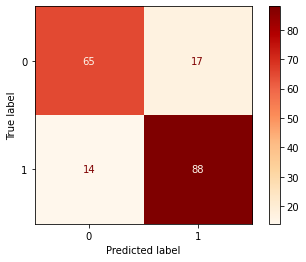

In [ ]:
X_train_removed = X_train.drop(columns=['RestingECG'], axis=1)
X_test_removed = X_test.drop(columns=['RestingECG'], axis=1)

GB_model.fit(X_train_removed,y_train)

y_predicted_removed = GB_model.predict(X_test_removed)

print_score(y_test, y_predicted_removed)
displr = plot_confusion_matrix(GB_model, X_test_removed, y_test ,cmap=plt.cm.OrRd , values_format='d')

Come possiamo vedere i risultati sono migliorati, il valore dell'accuracy è infatti salito a 0.83%.

##Cross-Validation

Applichiamo la Cross-Validation sul modello che ha prodotto i risultati migliori per vedere il suo comportamento.

In [ ]:
CV_scores = cross_val_score(GB_model, X_train_removed, y_train, scoring='accuracy', cv=5)

for i in range(5):
    print(i+1,":", CV_scores[i],"\n")

print('Media risultati Cross-Validation:', round(CV_scores.mean(),2),"%")

1 : 0.7959183673469388 

2 : 0.8707482993197279 

3 : 0.8979591836734694 

4 : 0.8367346938775511 

5 : 0.8767123287671232 

Media risultati Cross-Validation: 0.86 %


La Cross-Validation ha prodotto come valore medio di accuracy 0.86%

#HyperParameter Tuning

In questa fase cercheremo di migliorare i risultati del nostro modello attraverso la modifica del valore di alcuni parametri:
*   learning_rate
*   max_depth

Info: [Parametri GradientBoostingClassifier](https://scikit-learn.org/0.15/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

##GridSearch

In [ ]:
GB_tuned_gs = GradientBoostingClassifier()

parameters_gs = {"learning_rate":[0.01,0.1,1,10,100],
                 "max_depth":[1, 2, 4, 8, 16, 32, 64, 100, 200]}

GB_GridSearch = GridSearchCV(GB_tuned_gs, parameters_gs)
GB_GridSearch.fit(X_train_removed, y_train)

print("Valori migliori per i parametri: {}".format(GB_GridSearch.best_params_))
print("Miglior risultato: {:.3f}".format(GB_GridSearch.best_score_),"%")

Valori migliori per i parametri: {'learning_rate': 0.1, 'max_depth': 2}
Miglior risultato: 0.869 %


Il valore migliore per il parametro 'learning_rate' è 0.1 , mentre il valore migliore per il parametro 'max_depth' è 2. Proviamo se con questi parametri il nostro modello migliora.

1. Accuracy: 0.847826087
2. Precision: 0.843
3. Recall: 0.892
4. F1 score: 0.867
5. ROC AUC: 0.842


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


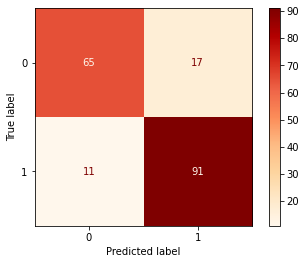

In [ ]:
GB_test_gs = GradientBoostingClassifier(learning_rate=0.1, max_depth=2)
GB_test_gs.fit(X_train_removed,y_train)

y_predicted_gs = GB_test_gs.predict(X_test_removed)

print_score(y_test, y_predicted_gs)
displr = plot_confusion_matrix(GB_test_gs, X_test_removed, y_test ,cmap=plt.cm.OrRd , values_format='d')

Il valore di 'accuracy' è salito a 0.84%.

##RandomizedSearch

In [ ]:
GB_tuned_rs = GradientBoostingClassifier()

parameters_rs = {"learning_rate":[0.01,0.1,1,10,100],
                 "max_depth":[1, 2, 4, 8, 16, 32, 64, 100, 200]}

random_param = dict(learning_rate=parameters_rs["learning_rate"], max_depth=parameters_rs["max_depth"])

GB_RandomizedSearch = RandomizedSearchCV(GB_tuned_rs, random_param, n_iter=30)
GB_RandomizedSearch.fit(X_train_removed, y_train)

print("Valori migliori per i parametri: {}".format(GB_RandomizedSearch.best_params_))
print("Miglior risultato: {:.3f}".format(GB_RandomizedSearch.best_score_), "%")

Valori migliori per i parametri: {'max_depth': 1, 'learning_rate': 1}
Miglior risultato: 0.825 %


1. Accuracy: 0.8315217391
2. Precision: 0.832
3. Recall: 0.873
4. F1 score: 0.852
5. ROC AUC: 0.827


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


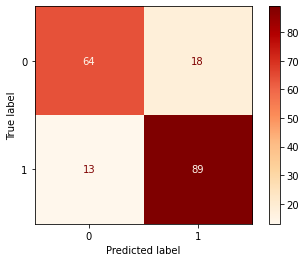

In [ ]:
GB_model_test_rs = GradientBoostingClassifier(learning_rate=1, max_depth=1)
GB_model_test_rs.fit(X_train_removed,y_train)

y_predicted_rs = GB_model_test_rs.predict(X_test_removed)

print_score(y_test, y_predicted_rs)
displr = plot_confusion_matrix(GB_model_test_rs, X_test_removed, y_test ,cmap=plt.cm.OrRd , values_format='d')

Il valore di 'accuracy' è 0.83%, è quindi perggiorato rispetto il modello su cui abbiamo applicato la GridSearch.

#Risultati

Andiamo ora a confrontare con le curve di ROC i risultati ottenuti dal modello iniziale e i modelli ottimizzati con l'hyper parameter tuning.

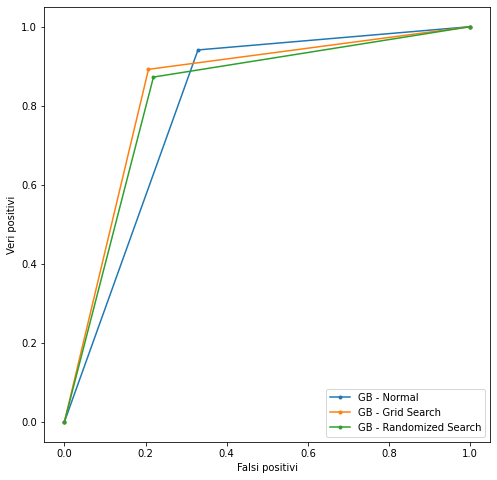

In [ ]:
GB_fpr, GB_tpr, GB_th = roc_curve(y_test, y_predicted_gb)

GB_fpr_gs, GB_tpr_gs, GB_th_gs = roc_curve(y_test, y_predicted_gs)

GB_fpr_rs, GB_tpr_rs, GB_th_rs = roc_curve(y_test, y_predicted_rs)

plt.figure(figsize=(8,8))

plt.plot(GB_fpr, GB_tpr, marker='.', label='GB - Normal')

plt.plot(GB_fpr_gs, GB_tpr_gs, marker='.', label='GB - Grid Search')

plt.plot(GB_fpr_rs, GB_tpr_rs, marker='.', label='GB - Randomized Search')

plt.legend()

plt.xlabel('Falsi positivi')
plt.ylabel('Veri positivi')

plt.show()

Come possiamo vedere dal grafico, il modello migliore è quello con i parametri ottenuti dal RandomizedSearch.

Abbiamo raggiunto un valore di 'accuracy' dell' 84%.

Applichiamo la Cross-Validation sul modello che ha prodotto i risultati migliori.

In [ ]:
CV_scores = cross_val_score(GB_test_gs, X_train_removed, y_train, scoring='accuracy', cv=5)

for i in range(5):
    print(i+1,":", CV_scores[i],"\n")

print('Media risultati Cross-Validation:', round(CV_scores.mean(),2),"%")

1 : 0.8435374149659864 

2 : 0.8639455782312925 

3 : 0.8979591836734694 

4 : 0.8503401360544217 

5 : 0.8904109589041096 

Media risultati Cross-Validation: 0.87 %


La Cross-Validation ha prodotto come valore medio di accuracy 0.87%